In [35]:
import keras
from keras.datasets import mnist 
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from PIL import Image

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
type(x_train)

numpy.ndarray

In [39]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

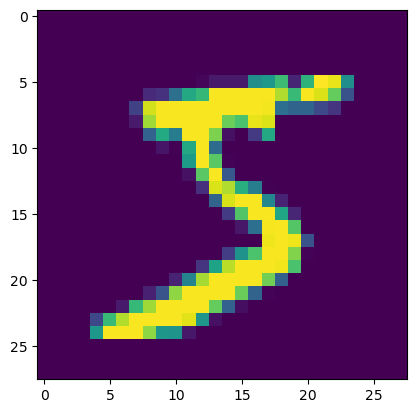

In [40]:
plt.imshow(x_train[0])

In [41]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

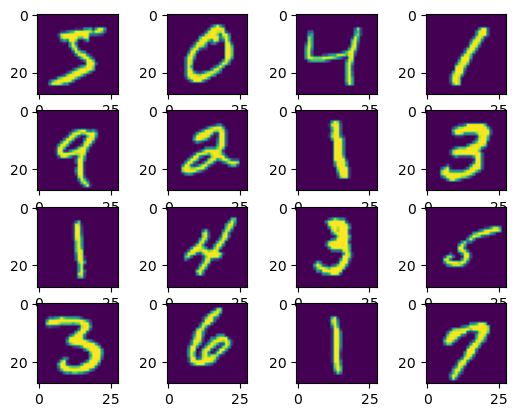

In [42]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [43]:
input_shape = (28, 28, 1)

In [44]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [45]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [46]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0507
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0507
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0507
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0507
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0507
CPU times: total: 23 s
Wall time: 16.3 s


In [47]:
x_train = x_train / 255
x_test = x_test / 255

In [48]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [49]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [50]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [51]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3141 - accuracy: 0.9124
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1563 - accuracy: 0.9545
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1159 - accuracy: 0.9651
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0938 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0792 - accuracy: 0.9762
CPU times: total: 22.7 s
Wall time: 14.8 s


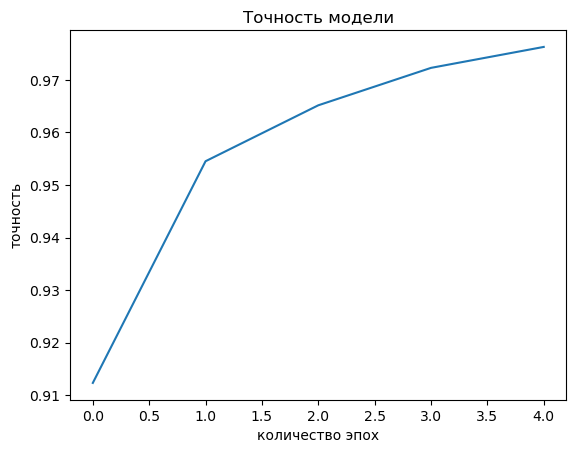

In [52]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

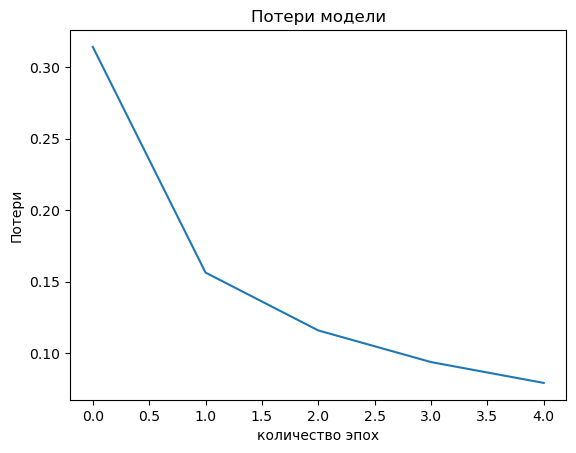

In [53]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [54]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9718


[0.09285562485456467, 0.9718000292778015]

In [55]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.0957 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9817 - val_loss: 0.0922 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0914 - val_accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0903 - val_accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.1002 - val_accuracy: 0.9706
CPU times: total: 23.9 s
Wall time: 16.4 s


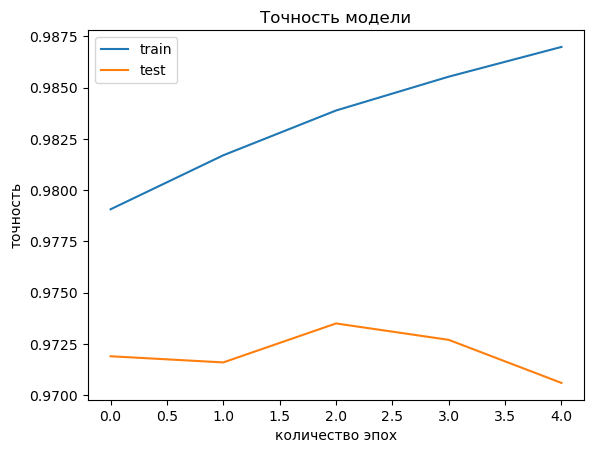

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


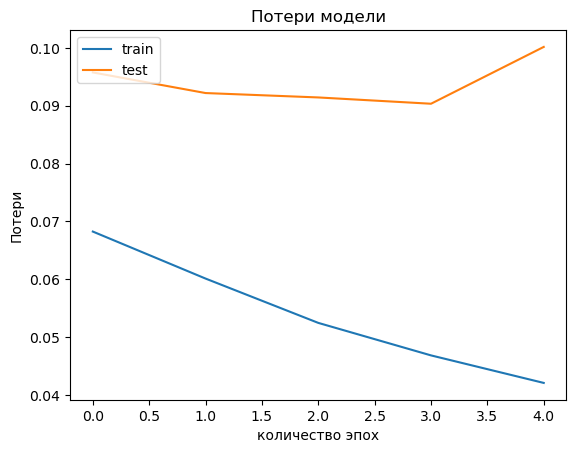

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
img_array = np.array([])
for i in range(1, 6):
    # Загружаем картинку, переводим изображение в двумерную матрицу, делаем картинку черно-белой и нормализуем её
    img = np.asarray(Image.open(f'img\img_{i}.jpg').convert('L').resize((28, 28)), ) / 255
    # Добавляем картинку в массив
    img_array = np.append(img_array, img) 
else:
    # Задаем размер матрицы (для 5 изображений будет 5, 28, 28)
    img_array = img_array.reshape(i, 28, 28)
    # Делаем прозрачный фон (белый цвет->прозрачный)
    img_array[img_array > 0.9 ] = 0

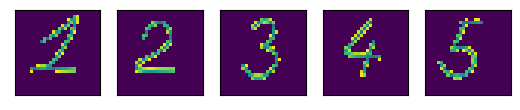

In [63]:
# Выведем собственные рукописные цыфры
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(img_array[i])
    # Убираем подписи к осям рисунков
    plt.xticks([])
    plt.yticks([])
plt.show()